Structures combined (lattice match).


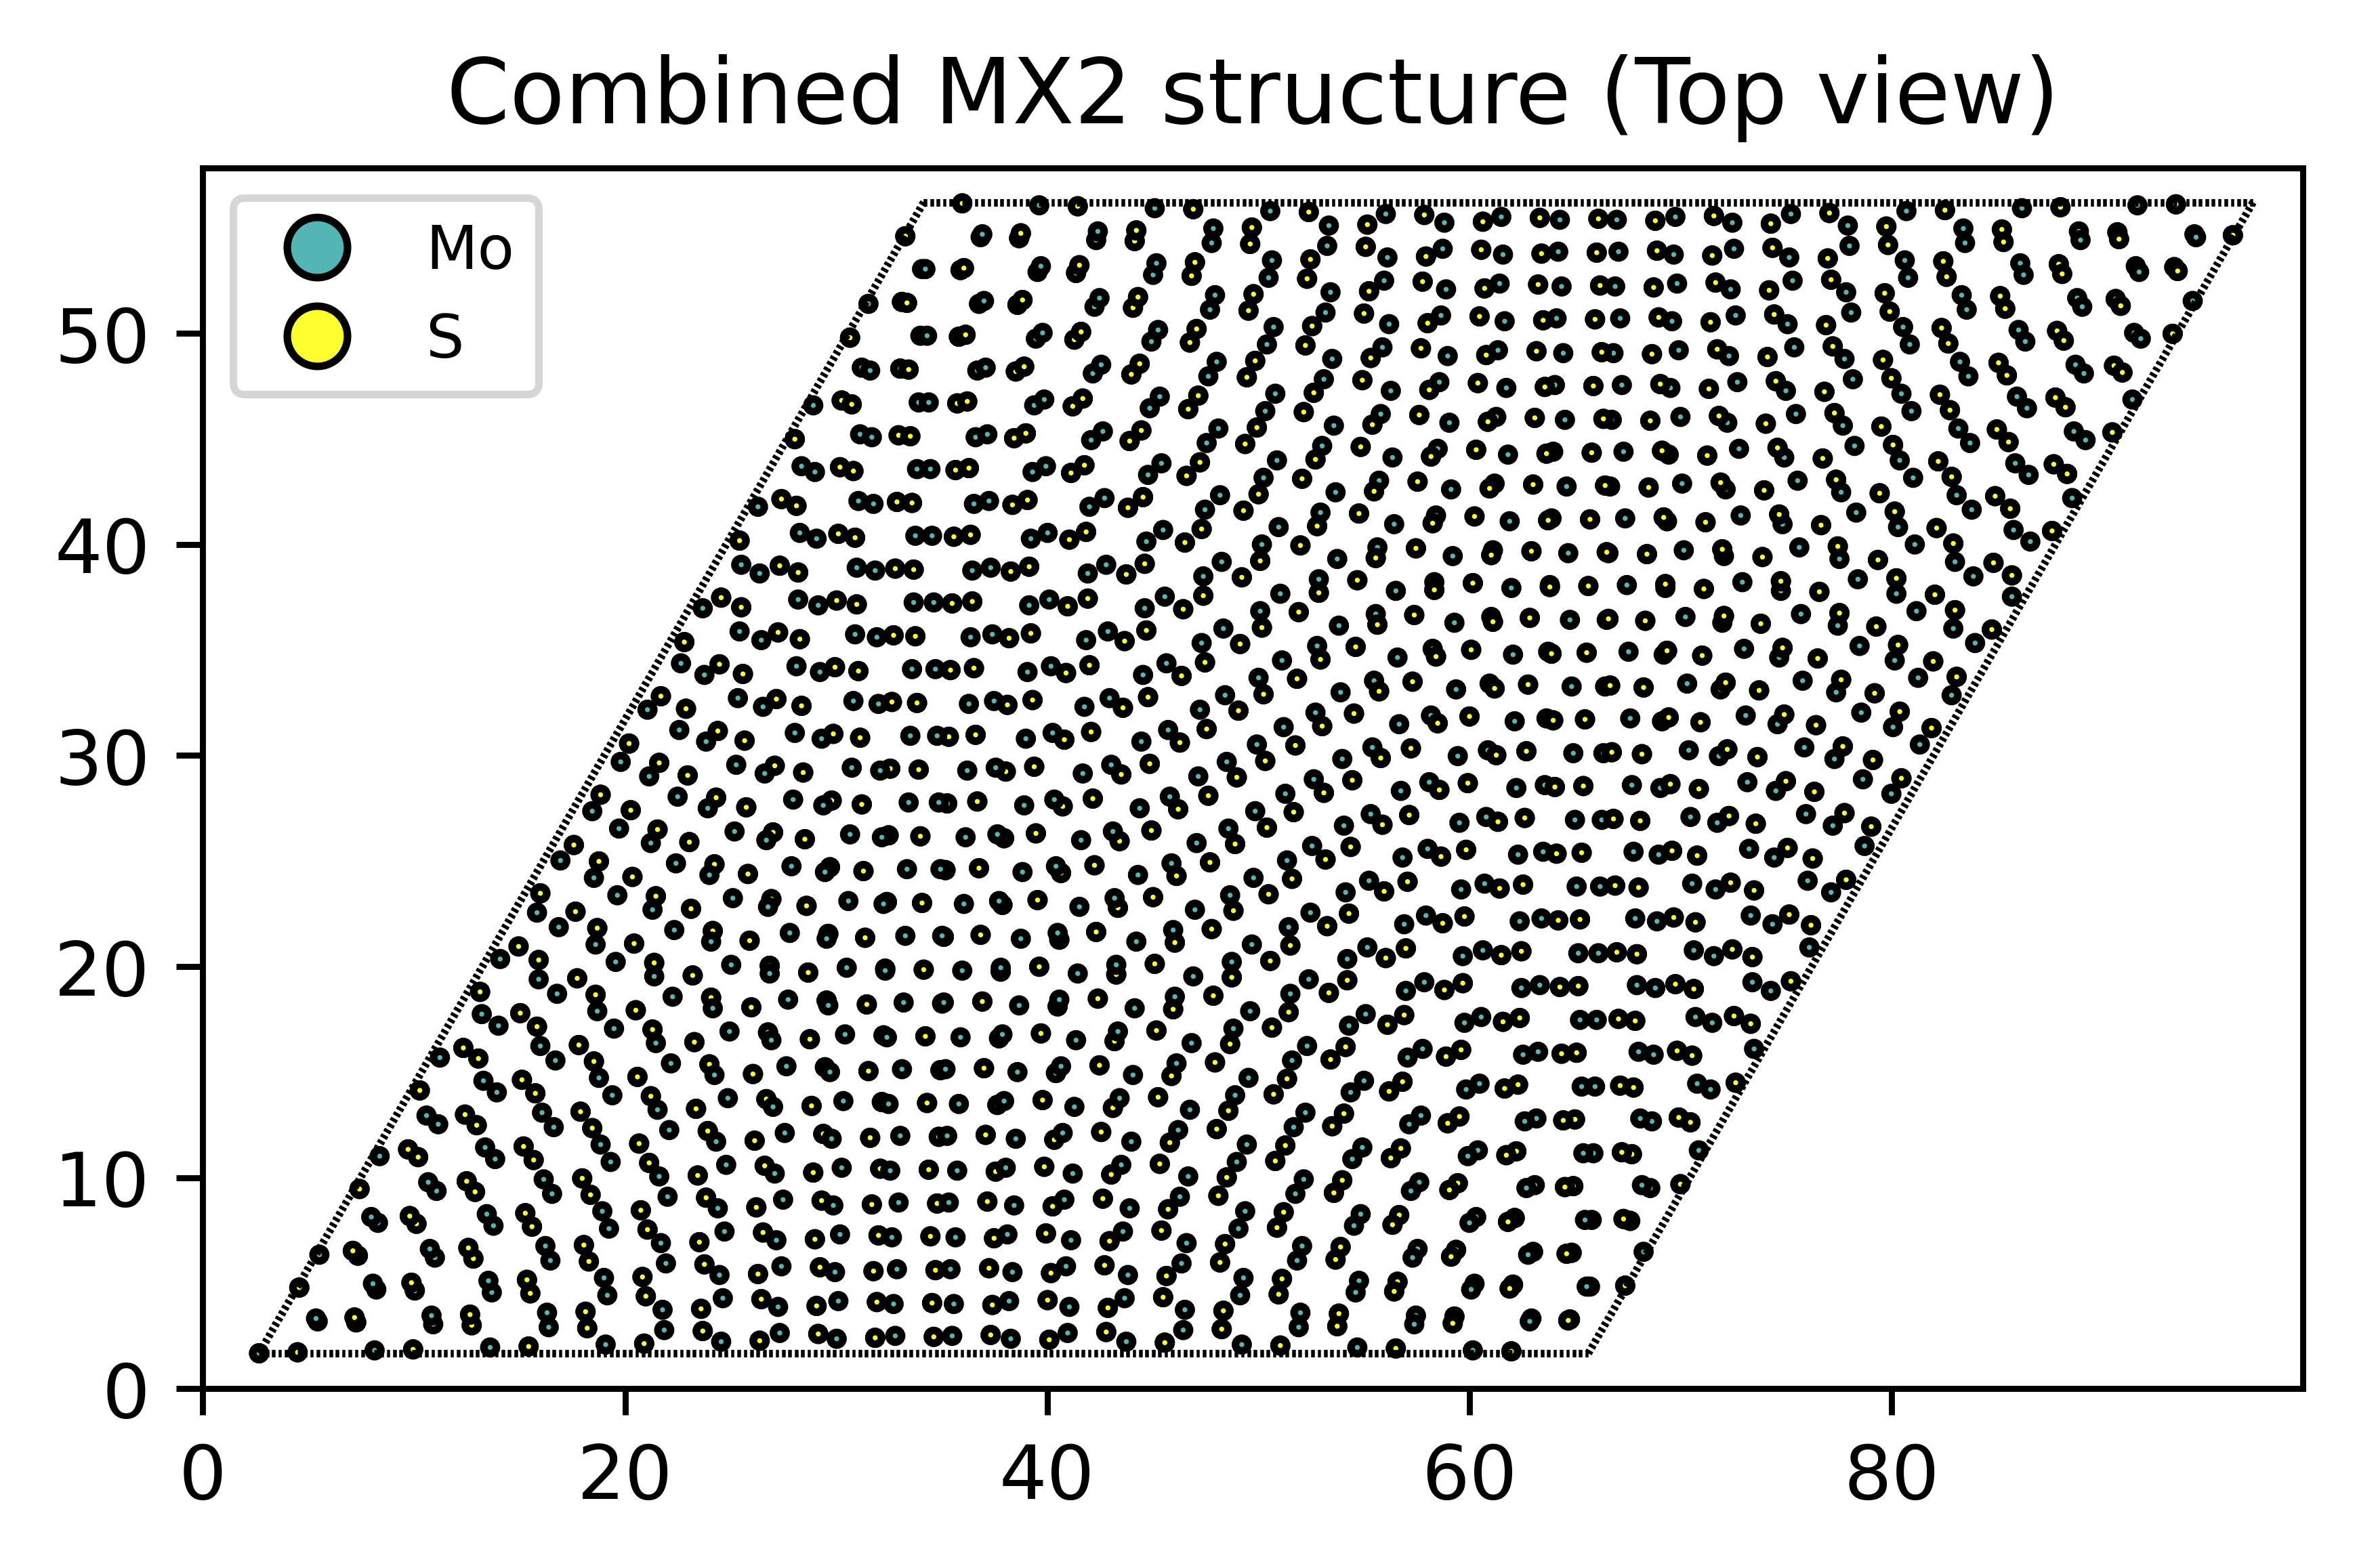

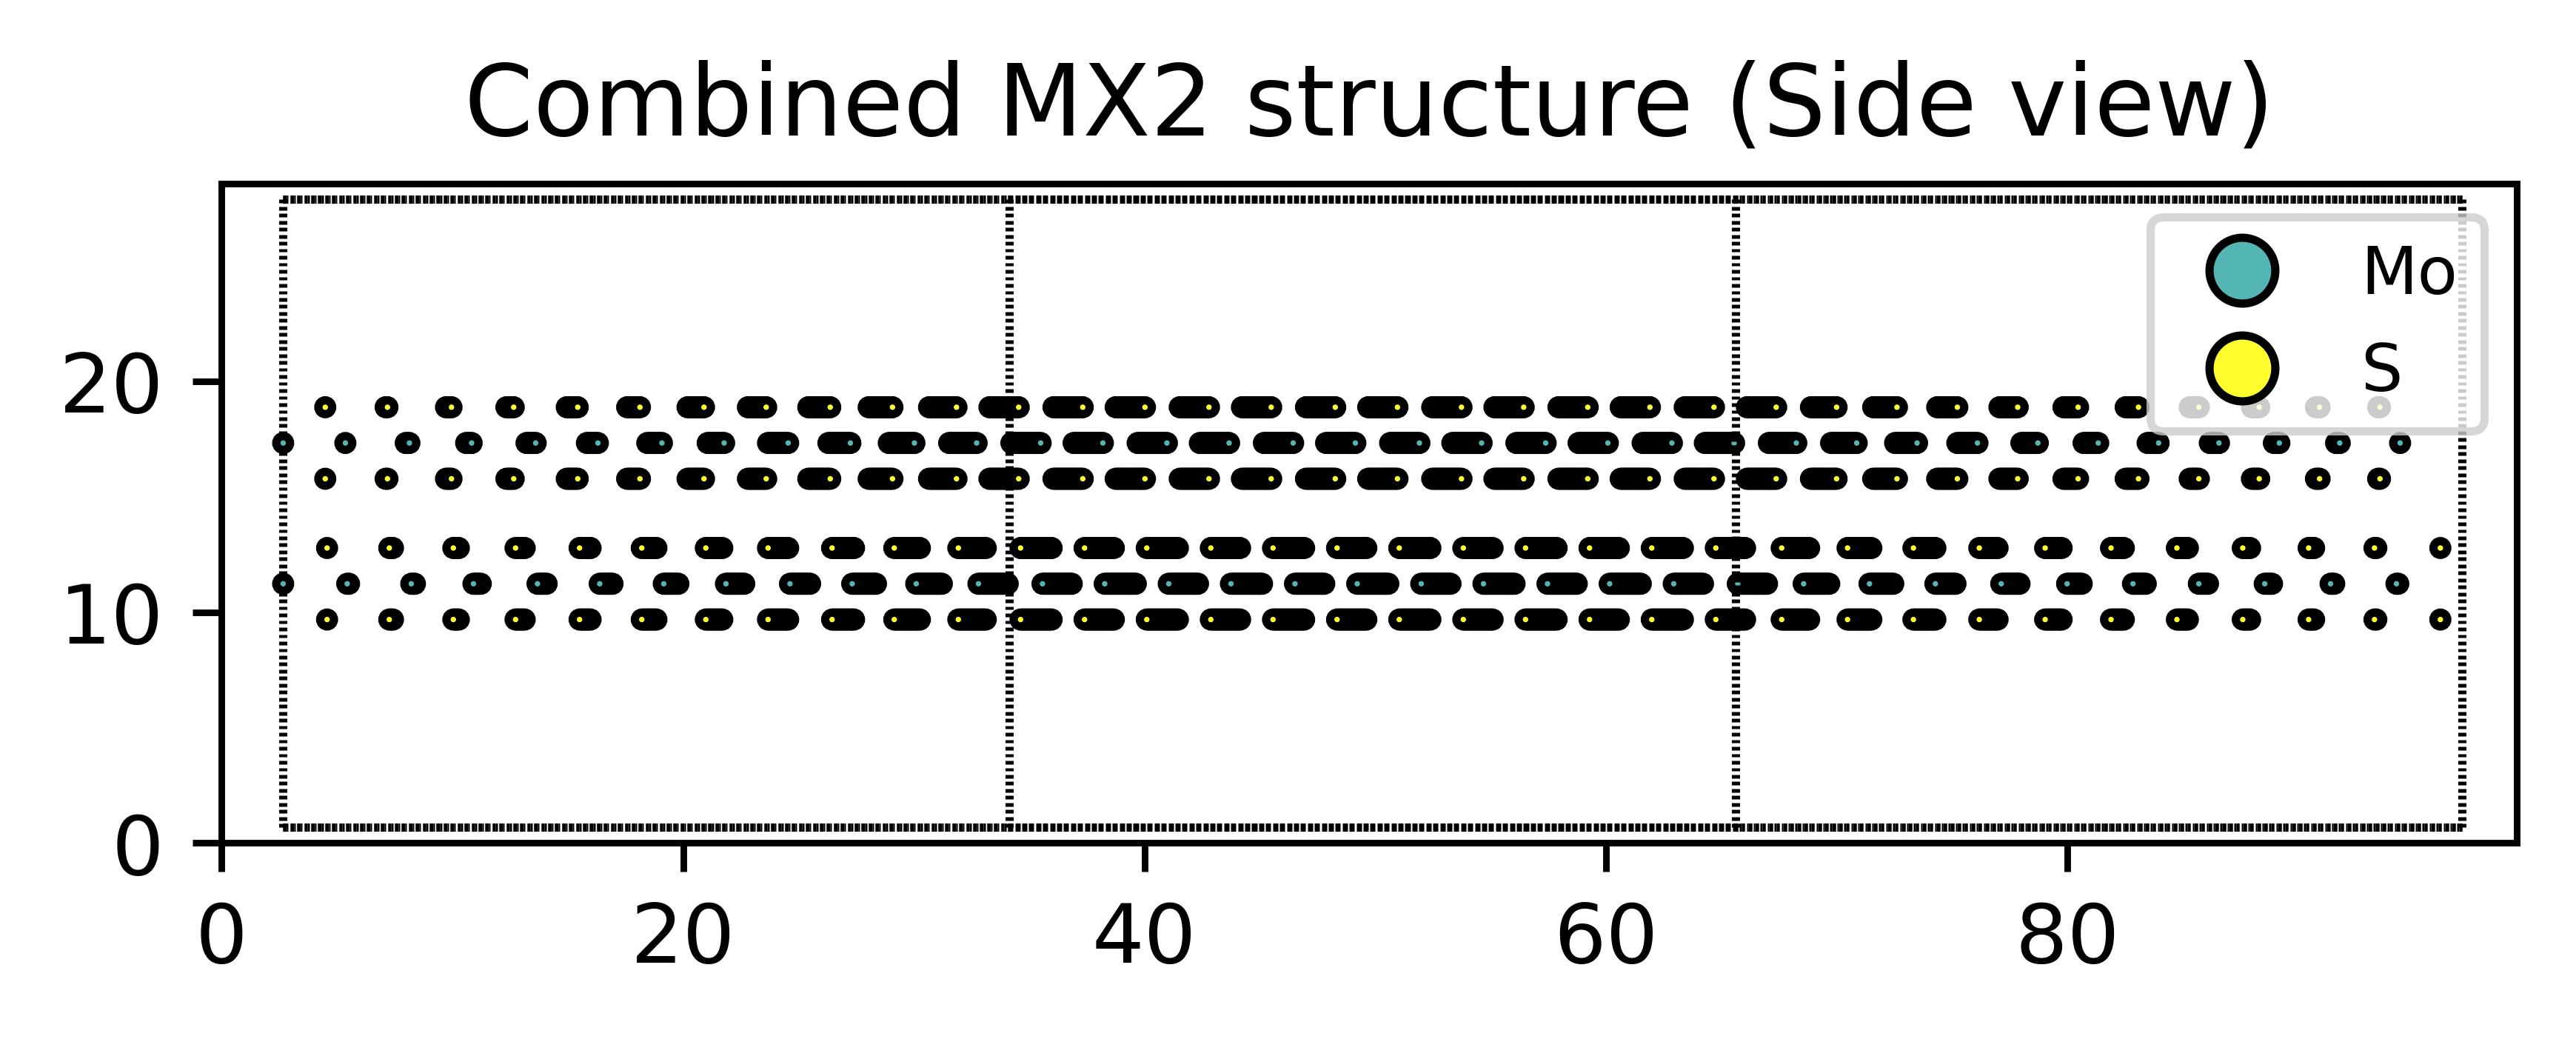

POSCAR written to «MoS2_MoS2_12_11.vasp»


In [11]:
import numpy as np
from ase import Atoms
from ase.build import make_supercell
from ase.visualize.plot import plot_atoms
from ase.data.colors import jmol_colors          # ASE/Jmol default color table
from ase.data import atomic_numbers              # element → Z
from ase.io import write  
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 800


# ------------------------------------------------------------------
# Bottom-layer builder
# ------------------------------------------------------------------
def build_and_plot_MX2_bot(M='Mo', X='S', vacuum=18, N_s=3, M_s=2):
    """Return bottom-layer supercell; geometry identical to user’s original code."""
    lattice_dict = {('Mo','S'):3.16, ('Mo','Se'):3.29, ('Mo','Te'):3.4915,
                    ('W','S'):3.16, ('W','Se'):3.29}
    xx_distance_dict   = {'S':3.1, 'Se':3.3, 'Te':3.5}
    interlayer_default = {'S':6.1, 'Se':6.5, 'Te':6.9}

    a       = lattice_dict[(M, X)]
    xx_dist = xx_distance_dict[X]
    d_I     = interlayer_default[X]
    c_axis  = d_I + xx_dist + vacuum

    a1 = [a*np.sqrt(3)/2, -a/2, 0]; a2 = [a*np.sqrt(3)/2, a/2, 0]
    cell = [a1, a2, [0,0,c_axis]]

    z0 = (vacuum + xx_dist)/2
    z_M, z_X1, z_X2 = z0, z0+xx_dist/2, z0-xx_dist/2
    pos = [[0,0,z_M], [a/np.sqrt(3),0,z_X1], [a/np.sqrt(3),0,z_X2]]

    atoms = Atoms([M,X,X], pos, cell=cell, pbc=[True]*3)

    P = np.array([[M_s, N_s, 0],
                  [-N_s, N_s+M_s, 0],
                  [0, 0, 1]])
    atoms = make_supercell(atoms, P)

    b1 = np.array(atoms.cell[0][:2])
    theta = np.degrees(np.arctan2(b1[1], b1[0]))
    atoms.rotate(-theta, 'z', rotate_cell=True)
    return atoms


# ------------------------------------------------------------------
# Top-layer builder
# ------------------------------------------------------------------
def build_and_plot_MX2_top(M='Mo', X='S', vacuum=18, N_s=2, M_s=1):
    """Return top-layer supercell; geometry identical to user’s original code."""
    lattice_dict = {('Mo','S'):3.16, ('Mo','Se'):3.29, ('Mo','Te'):3.4915,
                    ('W','S'):3.16, ('W','Se'):3.29}
    xx_distance_dict   = {'S':3.1, 'Se':3.3, 'Te':3.5}
    interlayer_default = {'S':6.1, 'Se':6.5, 'Te':6.9}

    a       = lattice_dict[(M, X)]
    xx_dist = xx_distance_dict[X]
    d_I     = interlayer_default[X]
    c_axis  = d_I + xx_dist + vacuum

    a1 = [a*np.sqrt(3)/2, -a/2, 0]; a2 = [a*np.sqrt(3)/2, a/2, 0]
    cell = [a1, a2, [0,0,c_axis]]

    z0 = (vacuum + xx_dist)/2 + d_I
    z_M, z_X1, z_X2 = z0, z0+xx_dist/2, z0-xx_dist/2
    pos = [[0,0,z_M], [a/np.sqrt(3),0,z_X1], [a/np.sqrt(3),0,z_X2]]

    atoms = Atoms([M,X,X], pos, cell=cell, pbc=[True]*3)

    P = np.array([[N_s, M_s, 0],
                  [-M_s, N_s+M_s, 0],
                  [0, 0, 1]])
    atoms = make_supercell(atoms, P)

    b1 = np.array(atoms.cell[0][:2])
    theta = np.degrees(np.arctan2(b1[1], b1[0]))
    atoms.rotate(-theta, 'z', rotate_cell=True)
    return atoms


# ------------------------------------------------------------------
# Parameters (unchanged)
# ------------------------------------------------------------------
top_M, top_X = 'Mo', 'S'
bot_M, bot_X = 'Mo', 'S'
vacuum       = 18
bot_N_s, bot_M_s = 12, 11
top_N_s, top_M_s = 12, 11

top = build_and_plot_MX2_top(top_M, top_X, vacuum, top_N_s, top_M_s)
bot = build_and_plot_MX2_bot(bot_M, bot_X, vacuum, bot_N_s, bot_M_s)


# ------------------------------------------------------------------
# Combine and visualize with ASE colours + legend
# ------------------------------------------------------------------
if np.allclose(bot.cell, top.cell, atol=1e-6):
    combined_atoms = bot + top
    print("Structures combined (lattice match).")

    # ---------------- legend helper ----------------
    def add_ase_legend(ax, atoms, legend_order=None, ms=8):
        """
        Add legend using ASE/Jmol colours.
        legend_order : list of element symbols (e.g. ['W','Mo','S']).
                       If provided, legend follows this order; otherwise elements
                       are sorted by atomic number.
        ms           : marker size.
        """
        elements = atoms.get_chemical_symbols()
        unique_elems = sorted(set(elements), key=lambda e: atomic_numbers[e])

        # respect user-defined order
        if legend_order is not None:
            unique_elems = [e for e in legend_order if e in unique_elems]

        handles = []
        for el in unique_elems:
            Z = atomic_numbers[el]
            color = tuple(jmol_colors[Z])
            handles.append(
                Line2D([0], [0], marker='o', markersize=ms,
                       markerfacecolor=color, markeredgecolor='k',
                       linestyle='None', label=el)
            )
        leg = ax.legend(handles=handles, frameon=True, fontsize=8, loc='best')
        leg.get_frame().set_alpha(0.8)

    # ---------- top-view ----------
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_atoms(combined_atoms, ax, rotation=('0x,0y,0z'),
               radii=[0.3]*len(combined_atoms))
    add_ase_legend(ax, combined_atoms, ms=8, legend_order=['Mo', 'S'])
    ax.set_title("Combined MX2 structure (Top view)")
    plt.show()

    # ---------- side-view ----------
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_atoms(combined_atoms, ax, rotation=('-90x,0y,0z'),
               radii=[0.3]*len(combined_atoms))
    add_ase_legend(ax, combined_atoms, ms=8, legend_order=['Mo', 'S'])
    ax.set_title("Combined MX2 structure (Side view)")
    plt.show()

    bot_tag = f"{bot_M}{bot_X}2"
    top_tag = f"{top_M}{top_X}2"
    NM_tag  = f"{bot_N_s}_{bot_M_s}"
    vasp_name = f"{bot_tag}_{top_tag}_{NM_tag}.vasp"
    write(vasp_name, combined_atoms, format='vasp', direct=True, vasp5=True, sort=True)
    print(f"POSCAR written to «{vasp_name}»")

else:
    print("Lattice (cell) not matched. Cannot combine structures.")
    print("Cell (bot):\n", bot.cell)
    print("Cell (top):\n", top.cell)